<a href="https://colab.research.google.com/github/l0g1c4p3/escp/blob/master/ESCPTest_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The scenario is that you are invited to present at a meeting where previous years' sales of your company are reviewed and new policies will be discussed in regards to priority Markets and the concession of Discounts.

You want to go to the meeting with some insights on the data.

The data set for this exercise is Orders_Redux.csv


First, a bit of preparation is necessary:
- importing the necessary packages 
- loading the data file.

In [14]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
uploaded_name = list(uploaded.keys())[0]
orders = pd.read_csv(uploaded_name)

Saving Global Superstore Orders 2016.csv to Global Superstore Orders 2016 (1).csv


Let's have a look at what the data looks like using head() and describe()

In [15]:
orders.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,13/11/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High


In [16]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,28.610970,26.478567
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,174.341066,57.251373
min,1.00000,1040.000000,0.440000,1.000000,0.000000,-6599.980000,1.002000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,933.570000


What is the distribution of orders according to their value?

Try adding the line

```
plt.yscale('log')
```

to use a logarithmic scale on the y axis.


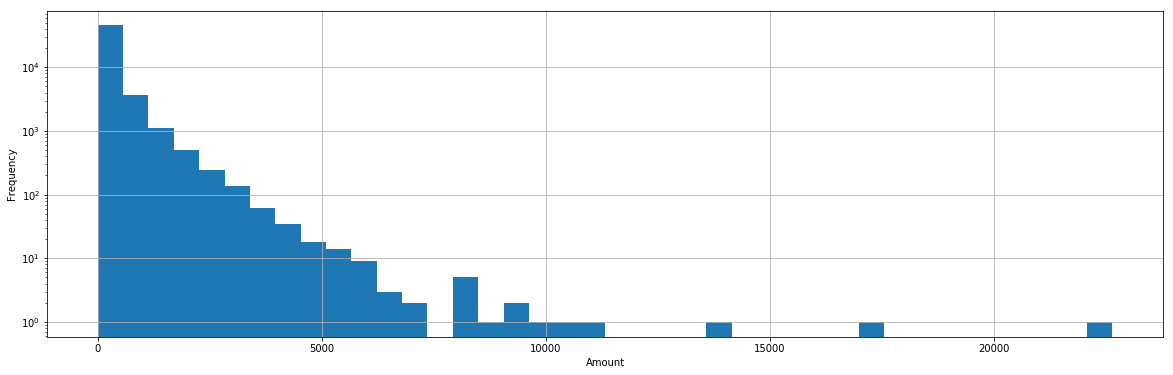

In [19]:
# Histogram of sales value, log scale

# plot formatting
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Amount')

_=orders['Sales'].hist(bins=40, figsize=(20,6))

The data is divided by Markets. Use a countplot to show a histogram of the number of orders by Market. 

Which markets have the most orders?

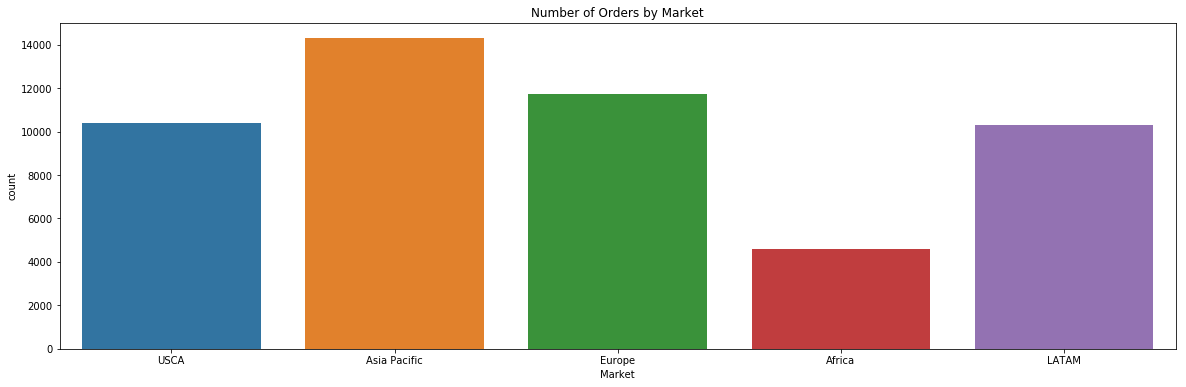

In [20]:
# See the distribution of countries to recognize different distributions
plt.figure(figsize=(20, 6))
plt.title('Number of Orders by Market');
sns.countplot(x='Market', data=orders);

How do we look at number of orders by Region instead?
Because there are 23 Regions, putting them on the y axis will make the plot easier to read.

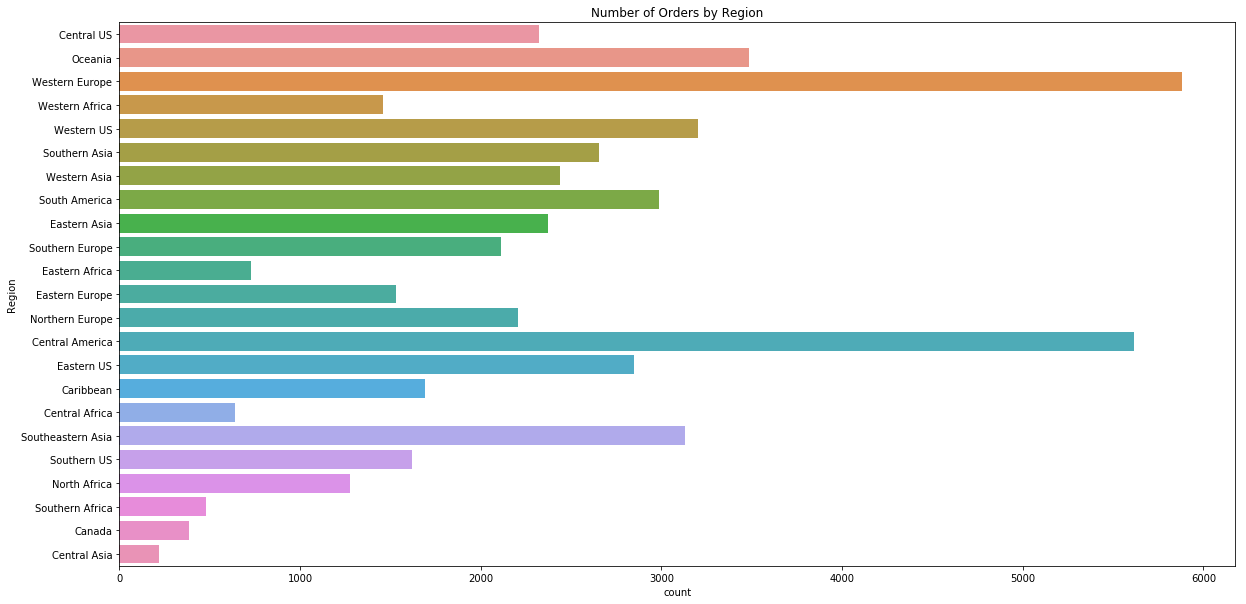

In [21]:
# See the distribution of countries to recognize different distributions
plt.figure(figsize=(20, 10))
plt.title('Number of Orders by Region');
sns.countplot(y='Region', data=orders);

We create datasets for two specific Markets: US and Central America (USCA) and Asia Pacific, so that we can compare the volume of sales of different values in each of them.

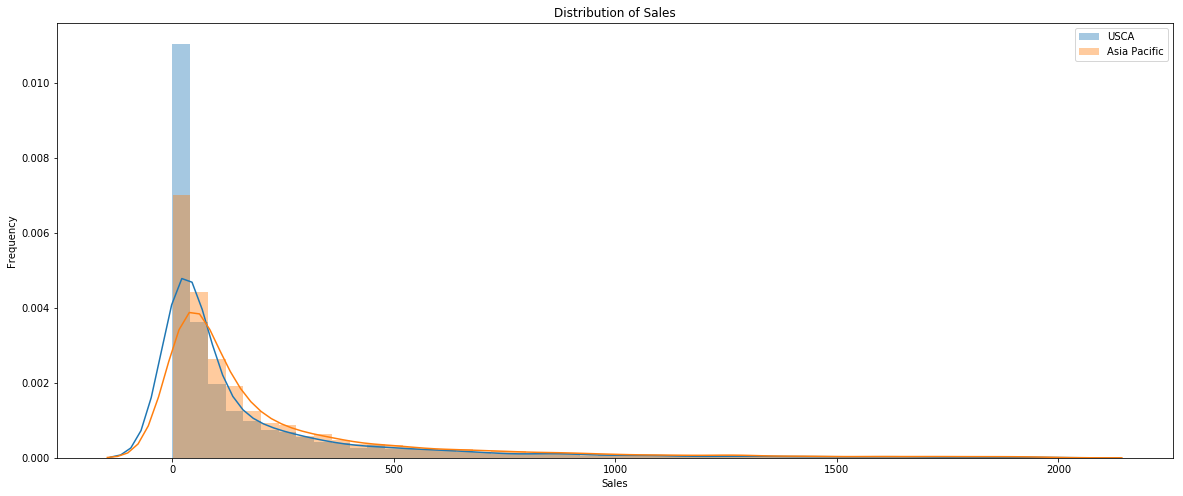

In [22]:
# See the distribution of sales values


# sub-dataset preparation
df_WEU=orders[orders.Market=="USCA"]
df_WEU = df_WEU[df_WEU.Sales<2000]

df_WUS=orders[orders.Market=="Asia Pacific"]
df_WUS = df_WUS[df_WUS.Sales<2000]

# plot formatting
plt.figure(figsize=(20, 8))
plt.title('Distribution of Sales');
plt.ylabel('Frequency')
sns.distplot(df_WEU['Sales'], label='USCA');
sns.distplot(df_WUS['Sales'], label='Asia Pacific');
plt.legend()
plt.show()

Browsing the dataset, we can see that many orders have negative profit. We want to understand if these are correlated with specific order sale amounts, or perhaps with specific Markets.

Use a scatterplot to show Sales vs Profit, with the discrete variable Market indicated using the hue parameter.

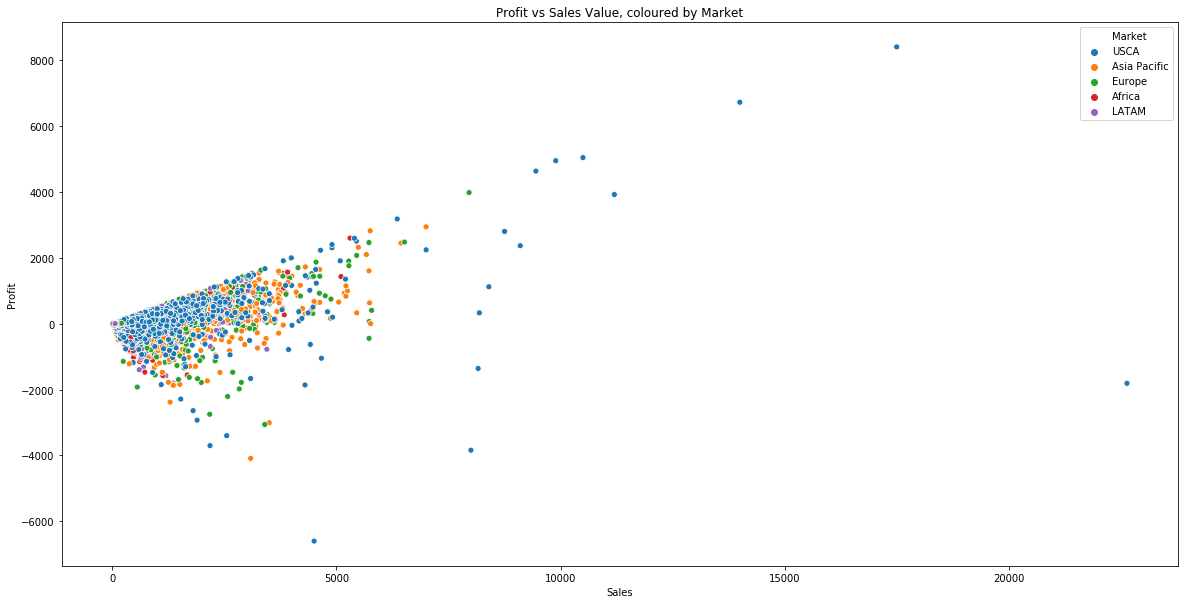

In [23]:
plt.figure(figsize=(20, 10))
plt.title('Profit vs Sales Value, coloured by Market');
sns.scatterplot('Sales', 'Profit', hue='Market', data=orders);

Why does the above plot take (roughly) that particular shape?

It seems that negative profit is  common in low value orders and uncommon in high value ones.
Markets don't seem to have much effect. However Markets are quite large and diverse. Perhaps a closer look at specific Regions, or even Countries may show a different story.


Let us have a look for example more specifically at Central America, plotting the Profit of all the orders, grouped by single Country.


A Strip Plot helps drawing a scatterplot where one variable is categorical. In our case Country is categorical.
The Jitter parameter in stripplot  distributes plotted points randomly over a certain width so that they don't all overlap and hide each other like they would normally do for categorical variables.


Are there countries where orders are consistently more (or less) profitable?

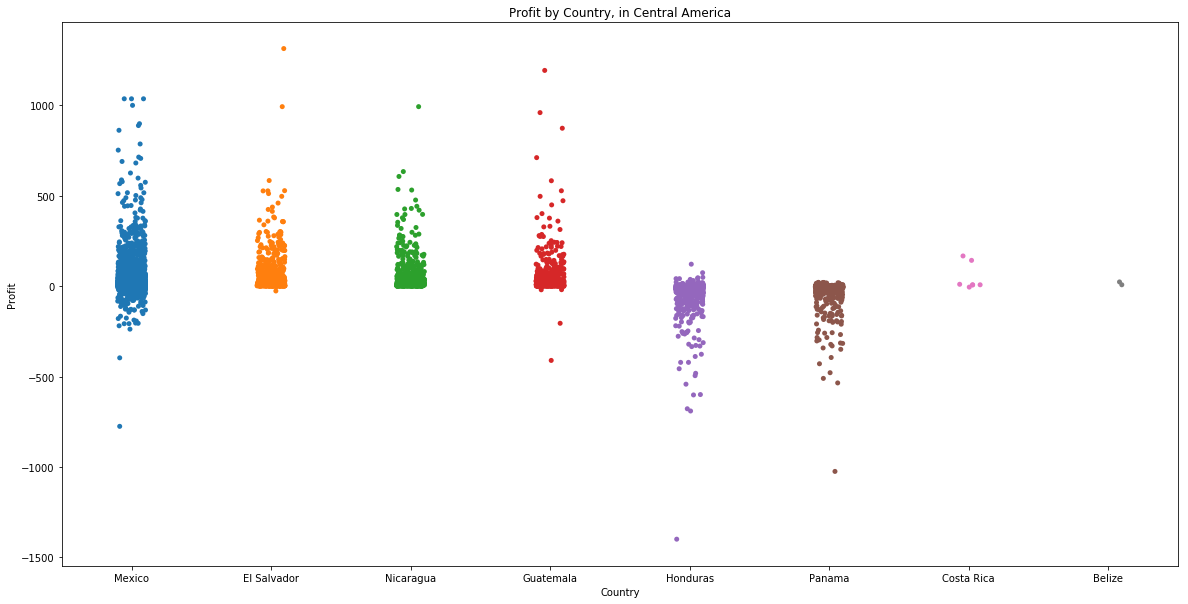

In [24]:
# Creates a data frame with only the orders from Central America
CeAm_orders = orders[orders['Region']=='Central America']

# Plot formatting
plt.figure(figsize=(20, 10))
plt.title('Profit by Country, in Central America');

# Strip plot of Order's Profit in each Country
_=sns.stripplot(x="Country", y="Profit", data=CeAm_orders, jitter=True)


Is there a correlation between Profit of the Orders and the Discount that is applied?
Try plotting the strip plot of Profit vs Discount for the entire data set.

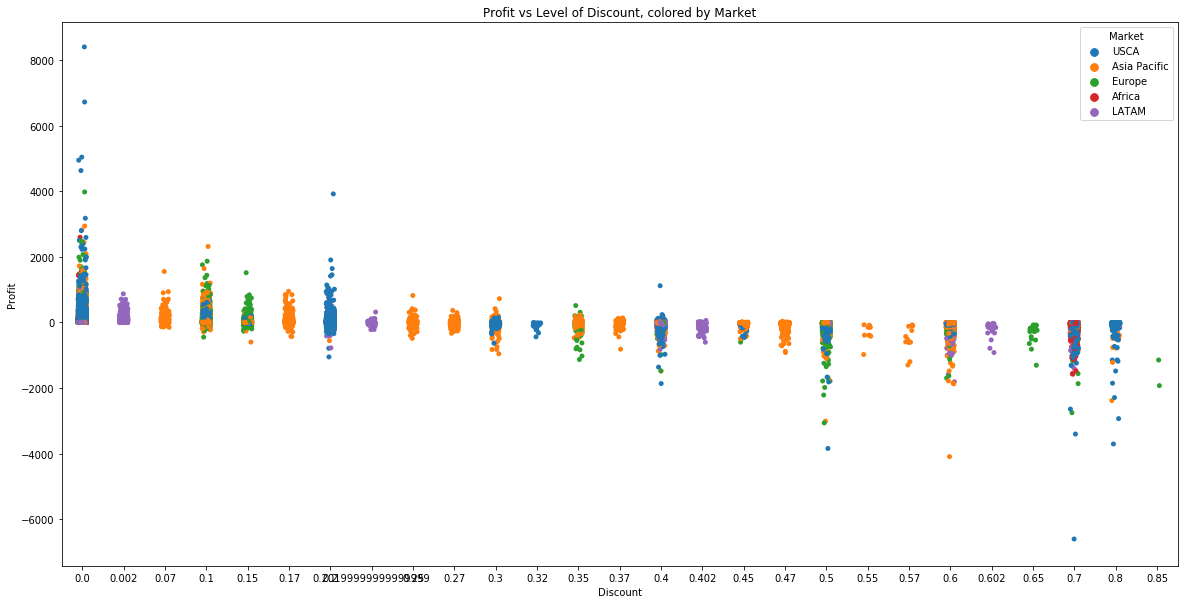

In [25]:
plt.figure(figsize=(20, 10))
plt.title('Profit vs Level of Discount, colored by Market');
_=sns.stripplot('Discount', 'Profit', hue='Market', data=orders, jitter=True);

Clearly discounts are inversely associated with profit. 

Markets don't seem particularly relevant, except Africa seemingly been associated with many higher discounts.


Let us do the same but just for Central America.
We notice the same trend.

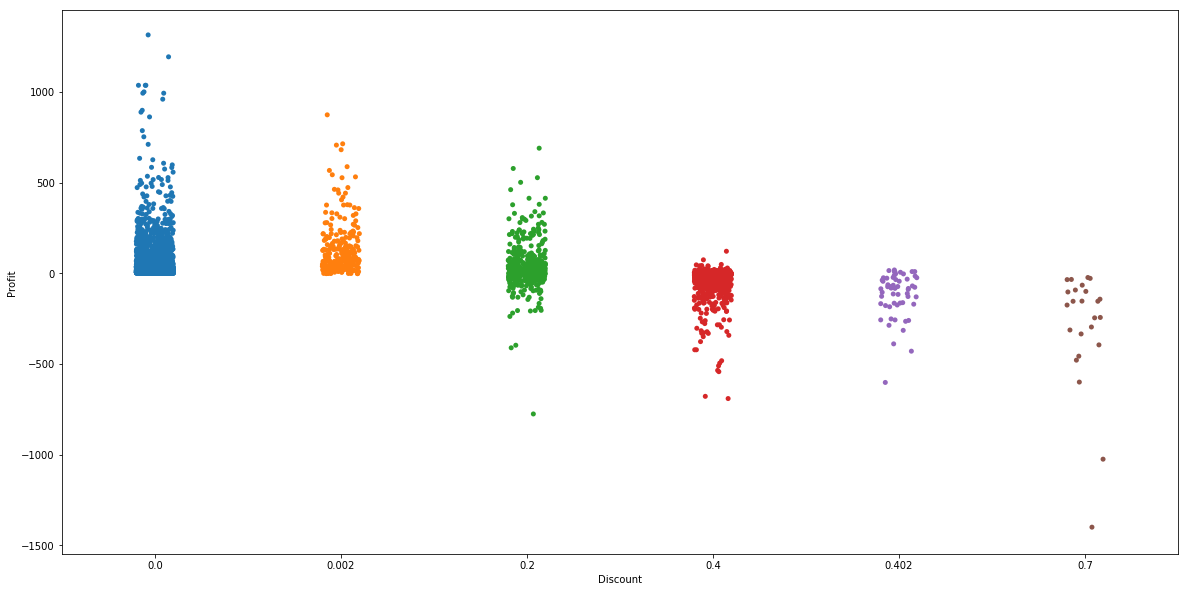

In [26]:
plt.figure(figsize=(20, 10))
plt.title('');
_=sns.stripplot(x="Discount", y="Profit", data=CeAm_orders, jitter=True)

Use a lmplot to draw the same Profit vs Discount data for Central America. This time lmplot will draw a linear regression line.

(-0.015, 1)

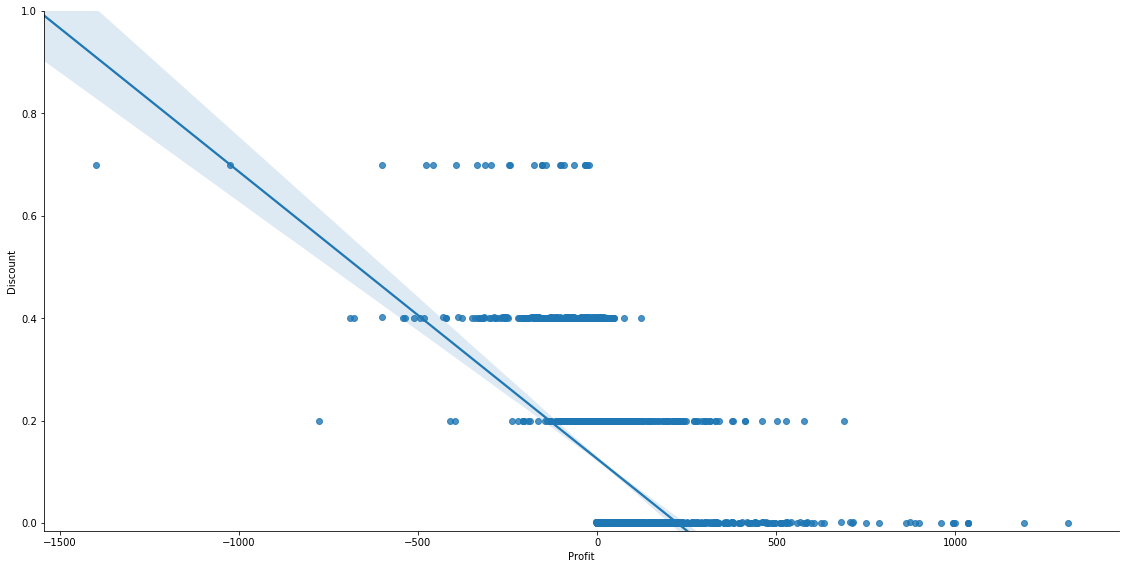

In [27]:
_=sns.lmplot('Profit', 'Discount', data=CeAm_orders, height=8, aspect=2);
plt.ylim(-0.015, 1)

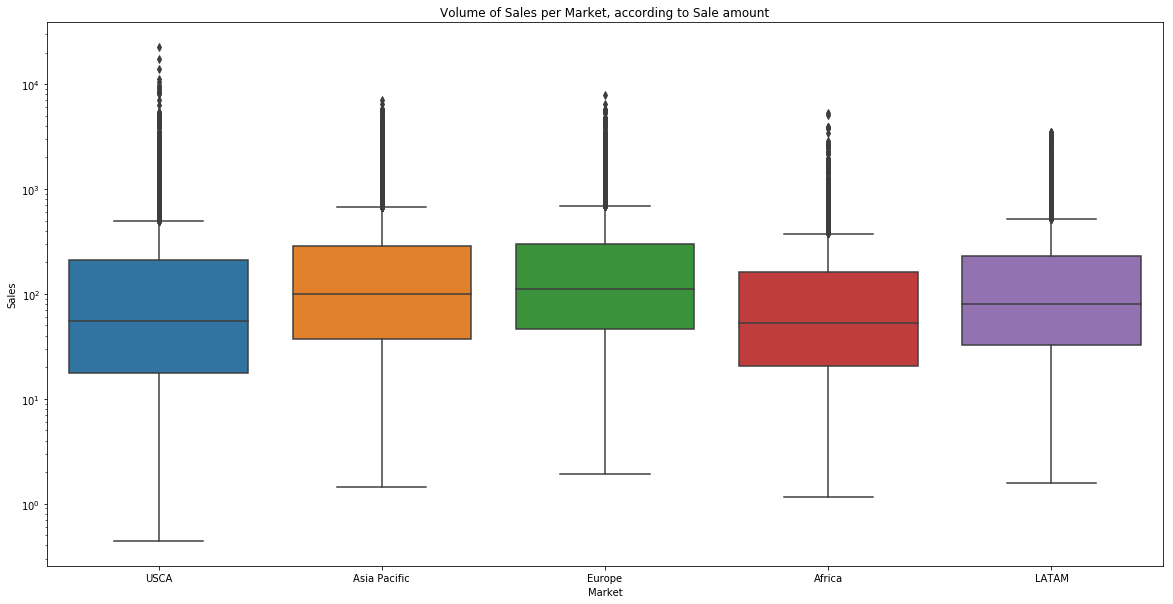

In [28]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.title('Volume of Sales per Market, according to Sale amount');
_=sns.boxplot(x="Market", y="Sales", data=orders)

There is clearly a sistematic difference between the American market and the rest of the world. The first being characterised by more Orders with low amounts.

Use a stripplot to show Sales per Market in the whole dataset. Try to adjust jitter so that the plot is clear.

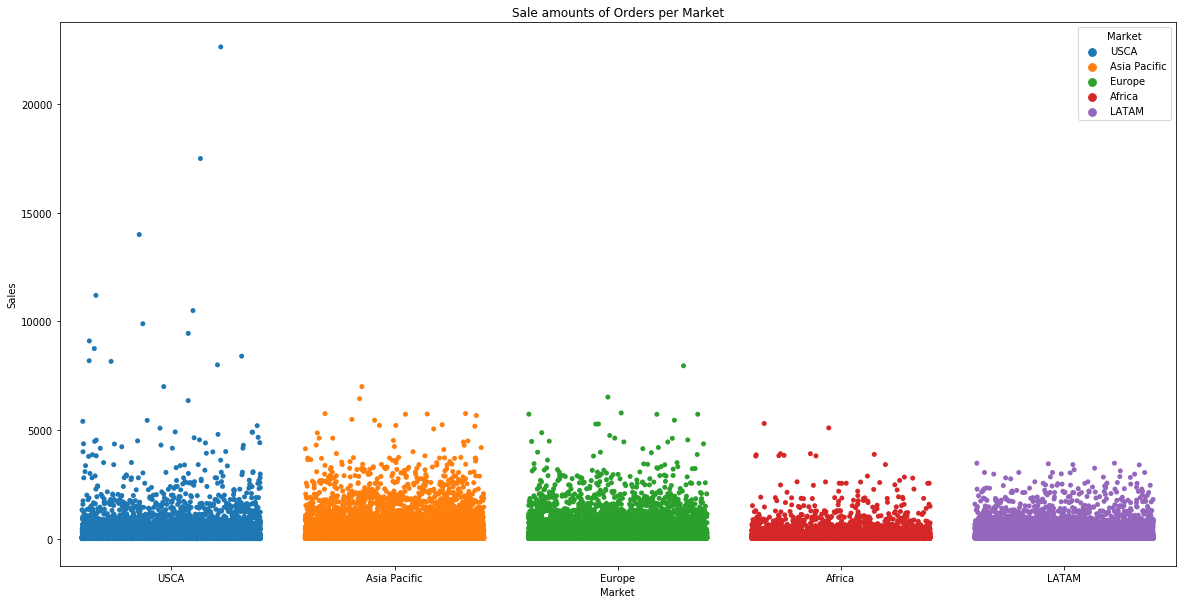

In [29]:
plt.figure(figsize=(20, 10))
plt.title('Sale amounts of Orders per Market');
_=sns.stripplot('Market', 'Sales', hue='Market', data=orders, jitter=0.4);